In [40]:
from itertools import cycle, islice

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import homogeneity_score, completeness_score, v_measure_score 

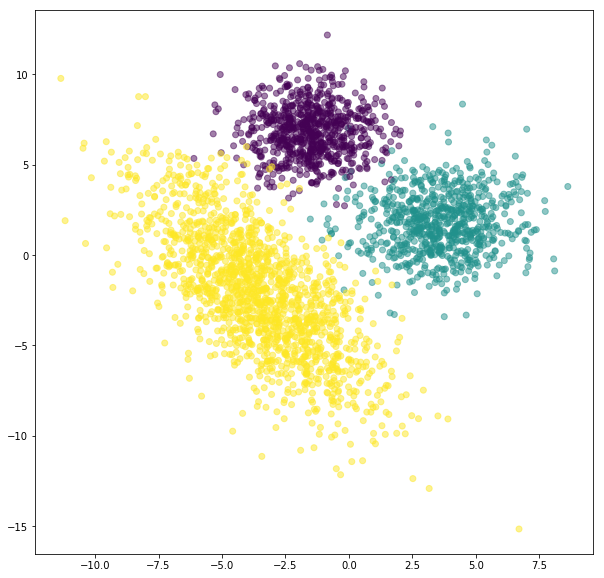

{0: 750, 1: 750, 2: 1500}

In [41]:
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))
{0: 750, 1: 750, 2: 1500}

0.513120978844
0.807281738409
0.784237337902
0.795592702456


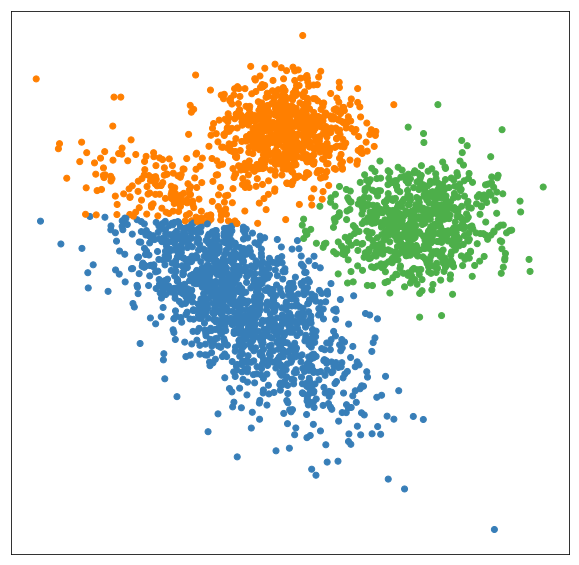

In [42]:
#X = StandardScaler().fit_transform(X)
k_means = KMeans(n_clusters=3, 
                 #init='k-means++', # 'k-means++', 'random', numpy.array
                 random_state=42,
                 #max_iter=300
                )

k_means.fit(X)
y_pred = k_means.labels_.astype(np.int)

#plt.subplot('K-Means')
plt.xticks([]); plt.yticks([])
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                              int(max(y_pred) + 1))))
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])
print(silhouette_score(X=X, labels=y_pred, metric='euclidean'))
print(homogeneity_score(labels_true=y, labels_pred=y_pred))
print(completeness_score(labels_true=y, labels_pred=y_pred))
print(v_measure_score(labels_true=y, labels_pred=y_pred))

In [43]:
print(k_means.cluster_centers_)
print(np.round(k_means.cluster_centers_).astype(np.int))
print(k_means.labels_)

[[-3.18996384 -2.90484307]
 [-2.38363475  6.23391526]
 [ 3.6296089   1.74479425]]
[[-3 -3]
 [-2  6]
 [ 4  2]]
[2 2 1 ..., 0 0 0]


In [44]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{0: 1320, 1: 938, 2: 742}

In [45]:
silhouette = (2,0)
for n in range(2,11):
    k_means = KMeans(n_clusters=n, 
                 #init='k-means++', # 'k-means++', 'random', numpy.array
                 random_state=42,
                 #max_iter=300
                )
    k_means.fit(X)
    y_pred = k_means.labels_.astype(np.int)
    s = silhouette_score(X=X, labels=y_pred, metric='euclidean')
    if s > silhouette[1]:
        silhouette = (n, s)
print(silhouette)

(3, 0.51312097884373054)


0.498932876069
0.933979134751
0.932574042166
0.9332760596


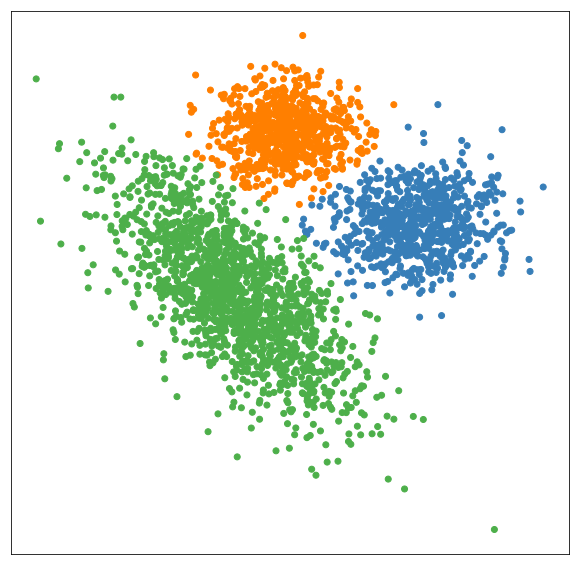

In [46]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, random_state=42)
#gm.fit(X)
#y_pred = gm.predict(X)
y_pred = gm.fit_predict(X)
plt.xticks([]); plt.yticks([])
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                              int(max(y_pred) + 1))))
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])
print(silhouette_score(X=X, labels=y_pred, metric='euclidean'))
print(homogeneity_score(labels_true=y, labels_pred=y_pred))
print(completeness_score(labels_true=y, labels_pred=y_pred))
print(v_measure_score(labels_true=y, labels_pred=y_pred))

In [47]:
means = gm.means_
means

array([[ 3.60809518,  1.73760829],
       [-1.50915711,  6.80752253],
       [-3.54551222, -2.12358327]])

In [48]:
print(np.round(gm.means_).astype(np.int))

[[ 4  2]
 [-2  7]
 [-4 -2]]


In [49]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{0: 744, 1: 763, 2: 1493}

In [50]:
silhouette = (2,0)
for n in range(2,11):
    gm = GaussianMixture(n_components=n, random_state=42)
    y_pred = gm.fit_predict(X)
    s = silhouette_score(X=X, labels=y_pred, metric='euclidean')
    if s > silhouette[1]:
        silhouette = (n, s)
print(silhouette)

(4, 0.51068230692608696)


0.481199221066
0.717914698781
0.690127711725
0.70374702436


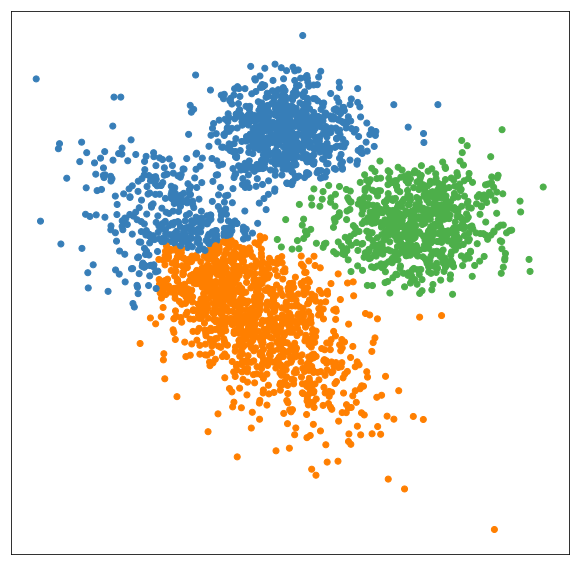

In [51]:
from sklearn.cluster import AgglomerativeClustering
import warnings

ac = AgglomerativeClustering(n_clusters=3, 
                                 #linkage='average',
                                 #connectivity=connectivity
                            )
    
with warnings.catch_warnings():
    warnings.filterwarnings(
        "ignore",
        message="the number of connected components of the " +
        "connectivity matrix is [0-9]{1,2}" +
        " > 1. Completing it to avoid stopping the tree early.",
        category=UserWarning)
    ac.fit(X)
y_pred = ac.labels_.astype(np.int)
plt.xticks([]); plt.yticks([])
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                              int(max(y_pred) + 1))))
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])
print(silhouette_score(X=X, labels=y_pred, metric='euclidean'))
print(homogeneity_score(labels_true=y, labels_pred=y_pred))
print(completeness_score(labels_true=y, labels_pred=y_pred))
print(v_measure_score(labels_true=y, labels_pred=y_pred))

In [52]:
ac.labels_

array([2, 2, 0, ..., 1, 1, 1])

In [53]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{0: 1112, 1: 1142, 2: 746}

In [55]:
silhouette = (2,0)
for n in range(2,11):
    ac = AgglomerativeClustering(n_clusters=n, 
                                 #linkage='average',
                                 #connectivity=connectivity
                            )
    
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="the number of connected components of the " +
            "connectivity matrix is [0-9]{1,2}" +
            " > 1. Completing it to avoid stopping the tree early.",
            category=UserWarning)
        ac.fit(X)
    y_pred = ac.labels_.astype(np.int)
    s = silhouette_score(X=X, labels=y_pred, metric='euclidean')
    if s > silhouette[1]:
        silhouette = (n, s)
print(silhouette)

(4, 0.48470679039805054)


0.491632041317
0.909978176738
0.905838699745
0.907903719905


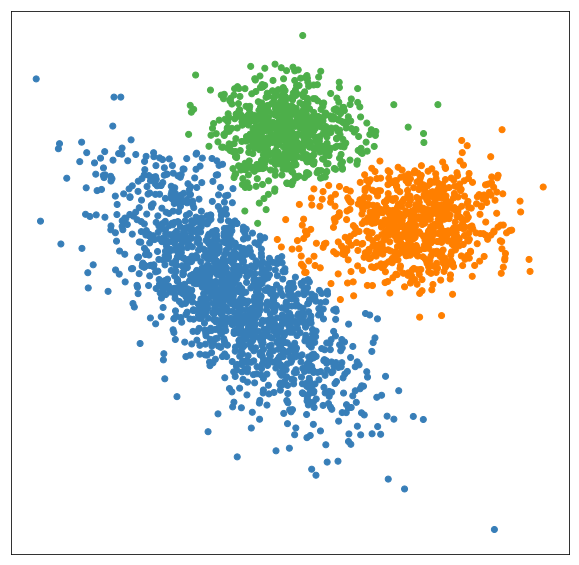

In [56]:
#X = StandardScaler().fit_transform(X)
ac = AgglomerativeClustering(n_clusters=3, 
                                 #linkage='average',
                                 #connectivity=connectivity
                            )
    
with warnings.catch_warnings():
    warnings.filterwarnings(
        "ignore",
        message="the number of connected components of the " +
        "connectivity matrix is [0-9]{1,2}" +
        " > 1. Completing it to avoid stopping the tree early.",
        category=UserWarning)
    ac.fit(StandardScaler().fit_transform(X))
y_pred = ac.labels_.astype(np.int)
plt.xticks([]); plt.yticks([])
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                              int(max(y_pred) + 1))))
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])
print(silhouette_score(X=X, labels=y_pred, metric='euclidean'))
print(homogeneity_score(labels_true=y, labels_pred=y_pred))
print(completeness_score(labels_true=y, labels_pred=y_pred))
print(v_measure_score(labels_true=y, labels_pred=y_pred))

0.494081281479
0.894288639998
0.891563815165
0.892924148834


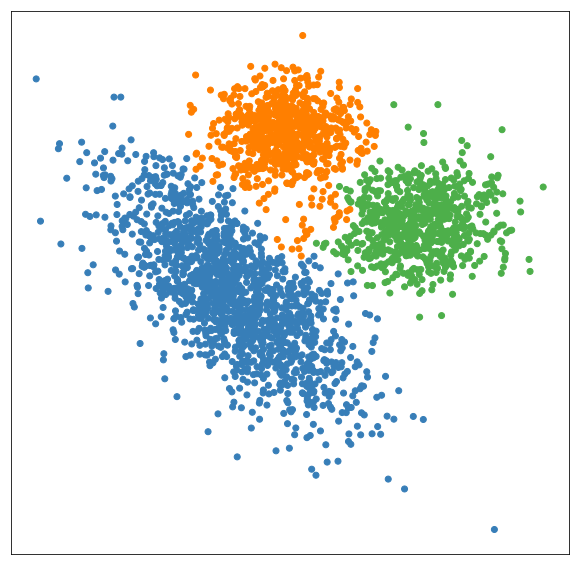

In [57]:
from sklearn.preprocessing import MinMaxScaler
#X = MinMaxScaler().fit_transform(X)
ac = AgglomerativeClustering(n_clusters=3, 
                                 #linkage='average',
                                 #connectivity=connectivity
                            )
    
with warnings.catch_warnings():
    warnings.filterwarnings(
        "ignore",
        message="the number of connected components of the " +
        "connectivity matrix is [0-9]{1,2}" +
        " > 1. Completing it to avoid stopping the tree early.",
        category=UserWarning)
    ac.fit(MinMaxScaler().fit_transform(X))
y_pred = ac.labels_.astype(np.int)
plt.xticks([]); plt.yticks([])
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                              int(max(y_pred) + 1))))
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])
print(silhouette_score(X=X, labels=y_pred, metric='euclidean'))
print(homogeneity_score(labels_true=y, labels_pred=y_pred))
print(completeness_score(labels_true=y, labels_pred=y_pred))
print(v_measure_score(labels_true=y, labels_pred=y_pred))

0.493044124407
0.903996461061
0.901276433922
0.902634398342


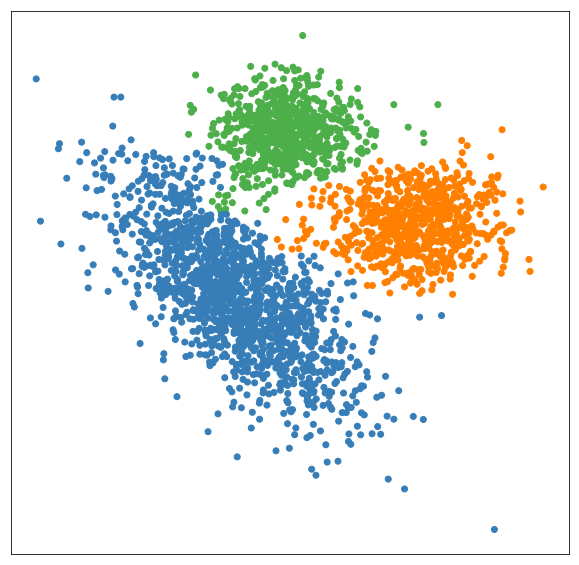

In [16]:
from sklearn.neighbors import kneighbors_graph

connectivity = kneighbors_graph(X, n_neighbors=6, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

ac = AgglomerativeClustering(n_clusters=3, 
                                 #linkage='average',
                                 connectivity=connectivity
                            )
    
with warnings.catch_warnings():
    warnings.filterwarnings(
        "ignore",
        message="the number of connected components of the " +
        "connectivity matrix is [0-9]{1,2}" +
        " > 1. Completing it to avoid stopping the tree early.",
        category=UserWarning)
    ac.fit(X)
y_pred = ac.labels_.astype(np.int)
plt.xticks([]); plt.yticks([])
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                              int(max(y_pred) + 1))))
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])
print(silhouette_score(X=X, labels=y_pred, metric='euclidean'))
print(homogeneity_score(labels_true=y, labels_pred=y_pred))
print(completeness_score(labels_true=y, labels_pred=y_pred))
print(v_measure_score(labels_true=y, labels_pred=y_pred))

In [17]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{0: 1486, 1: 746, 2: 768}

In [18]:
print(ac.n_leaves_)

3000


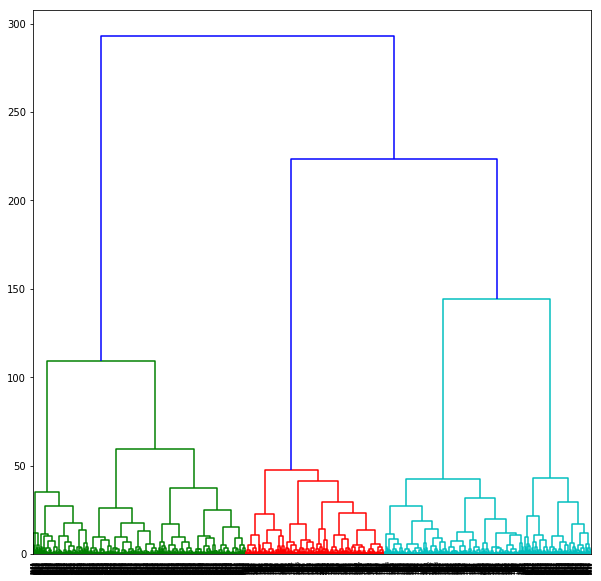

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage

# подготовим данные для построения дендрограммы
# ещё один способ выполнить агломеративную кластеризацию
Z = linkage(X, "ward")

# строим дендрограмму
dn1 = dendrogram(Z, leaf_rotation=90.)

0.445433553928
0.868935647387
0.696555405894
0.77325491103


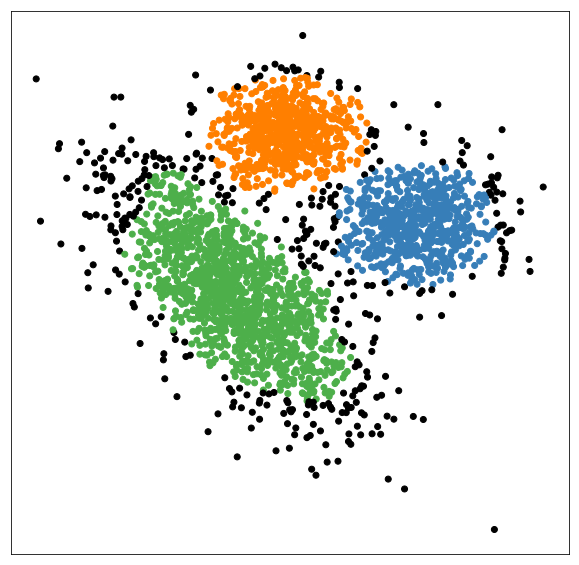

In [29]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.9, min_samples=35)
    
dbscan.fit(X)
y_pred = dbscan.labels_.astype(np.int)

#plt.subplot(f'23{i}')
plt.xticks([]); plt.yticks([])
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
# чёрным цветом отметим выбросы
colors = np.append(colors, ["#000000"])
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])
print(silhouette_score(X=X, labels=y_pred, metric='euclidean'))
print(homogeneity_score(labels_true=y, labels_pred=y_pred))
print(completeness_score(labels_true=y, labels_pred=y_pred))
print(v_measure_score(labels_true=y, labels_pred=y_pred))

In [30]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{-1: 368, 0: 656, 1: 721, 2: 1255}

In [36]:
print(y_pred.shape)

(3000,)


In [38]:
newy = []
newyp = []
for y_, yp_ in zip(y, y_pred):
    if yp_ !=-1:
        newy.append(y_)
        newyp.append(yp_)
print(v_measure_score(labels_true=newy, labels_pred=newyp))
    

0.966728130068


0.403049338996
0.810068358094
0.626113720941
0.706310044258


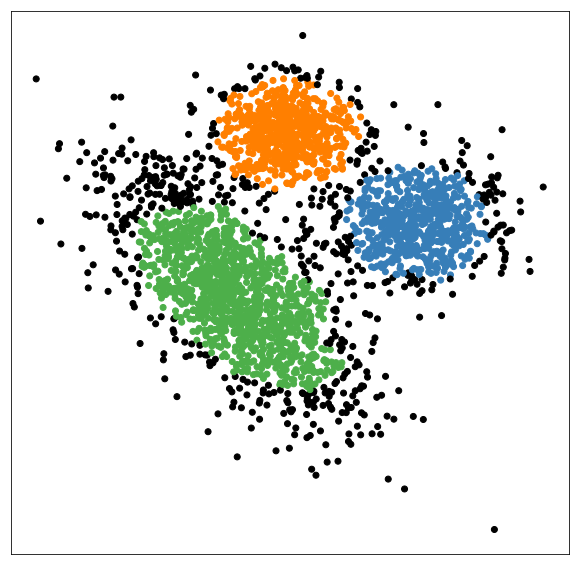

In [22]:
dbscan = DBSCAN(eps=0.8, min_samples=35)
    
dbscan.fit(X)
y_pred = dbscan.labels_.astype(np.int)

#plt.subplot(f'23{i}')
plt.xticks([]); plt.yticks([])
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
# чёрным цветом отметим выбросы
colors = np.append(colors, ["#000000"])
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))
print(silhouette_score(X=X, labels=y_pred, metric='euclidean'))
print(homogeneity_score(labels_true=y, labels_pred=y_pred))
print(completeness_score(labels_true=y, labels_pred=y_pred))
print(v_measure_score(labels_true=y, labels_pred=y_pred))

0.512486842753
0.803118685644
0.779543719715
0.791155619113


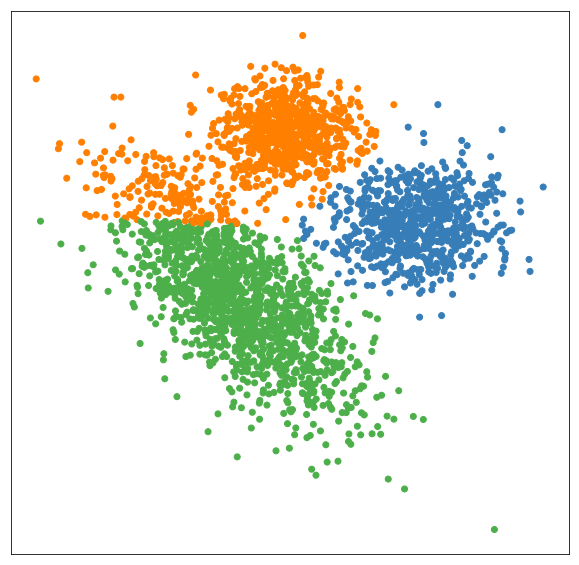

In [23]:
k_means = KMeans(n_clusters=3, 
                 init='k-means++', # 'k-means++', 'random', numpy.array
                 random_state=42,
                 n_init=1
                 #max_iter=300
                )

k_means.fit(X)
y_pred = k_means.labels_.astype(np.int)

#plt.subplot('K-Means')
plt.xticks([]); plt.yticks([])
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                              int(max(y_pred) + 1))))
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])
print(silhouette_score(X=X, labels=y_pred, metric='euclidean'))
print(homogeneity_score(labels_true=y, labels_pred=y_pred))
print(completeness_score(labels_true=y, labels_pred=y_pred))
print(v_measure_score(labels_true=y, labels_pred=y_pred))

0.512874360438
0.801396895244
0.779593851153
0.790345033061


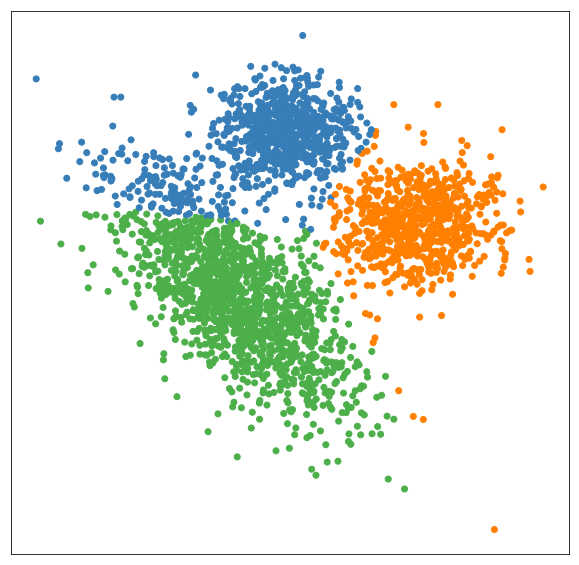

In [24]:
#X = StandardScaler().fit_transform(X)
k_means = KMeans(n_clusters=3, 
                 init='random', # 'k-means++', 'random', numpy.array
                 random_state=42,
                 n_init=1
                 #max_iter=300
                )

k_means.fit(StandardScaler().fit_transform(X))
y_pred = k_means.labels_.astype(np.int)

#plt.subplot('K-Means')
plt.xticks([]); plt.yticks([])
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                              int(max(y_pred) + 1))))
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])
print(silhouette_score(X=X, labels=y_pred, metric='euclidean'))
print(homogeneity_score(labels_true=y, labels_pred=y_pred))
print(completeness_score(labels_true=y, labels_pred=y_pred))
print(v_measure_score(labels_true=y, labels_pred=y_pred))

0.499171279383
0.762996847974
0.736947564172
0.749746009295


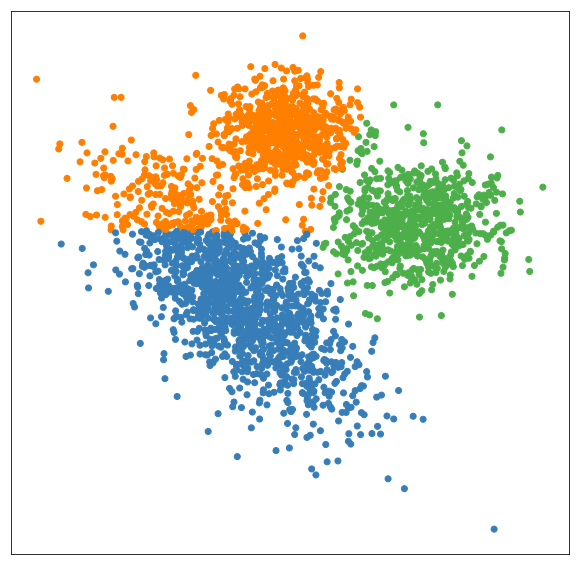

In [101]:
from sklearn.cluster import MiniBatchKMeans
#X = StandardScaler().fit_transform(X)
k_means = MiniBatchKMeans(n_clusters=3, 
                 #init='random', # 'k-means++', 'random', numpy.array
                 random_state=42,
                 n_init=1
                 #max_iter=300
                )

k_means.fit(StandardScaler().fit_transform(X))
y_pred = k_means.labels_.astype(np.int)

#plt.subplot('K-Means')
plt.xticks([]); plt.yticks([])
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                              int(max(y_pred) + 1))))
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])
print(silhouette_score(X=X, labels=y_pred, metric='euclidean'))
print(homogeneity_score(labels_true=y, labels_pred=y_pred))
print(completeness_score(labels_true=y, labels_pred=y_pred))
print(v_measure_score(labels_true=y, labels_pred=y_pred))

Разный тип расстояния для агломеративной кластеризации

0.481199221066
0.717914698781
0.690127711725
0.70374702436


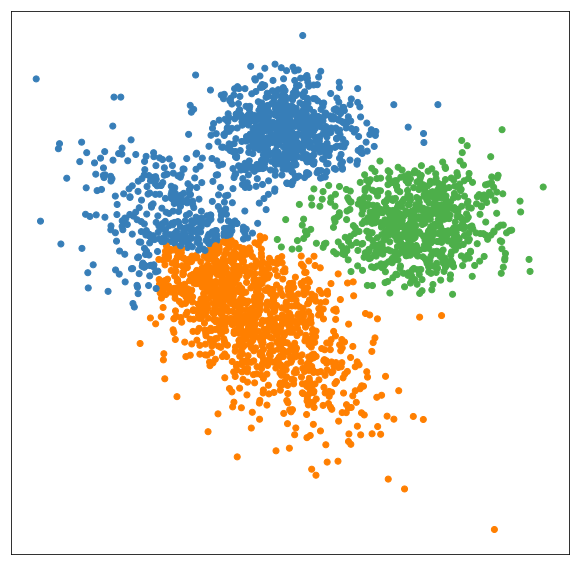

In [25]:
from sklearn.neighbors import kneighbors_graph

#connectivity = kneighbors_graph(X, n_neighbors=6, include_self=False)
#connectivity = 0.5 * (connectivity + connectivity.T)

ac = AgglomerativeClustering(n_clusters=3, 
                                 linkage='ward',
                                 #connectivity=connectivity
                            )
    
with warnings.catch_warnings():
    warnings.filterwarnings(
        "ignore",
        message="the number of connected components of the " +
        "connectivity matrix is [0-9]{1,2}" +
        " > 1. Completing it to avoid stopping the tree early.",
        category=UserWarning)
    ac.fit(X)
y_pred = ac.labels_.astype(np.int)
plt.xticks([]); plt.yticks([])
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                              int(max(y_pred) + 1))))
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])
print(silhouette_score(X=X, labels=y_pred, metric='euclidean'))
print(homogeneity_score(labels_true=y, labels_pred=y_pred))
print(completeness_score(labels_true=y, labels_pred=y_pred))
print(v_measure_score(labels_true=y, labels_pred=y_pred))

0.280534685948
0.387806794803
0.436046533325
0.410514354195


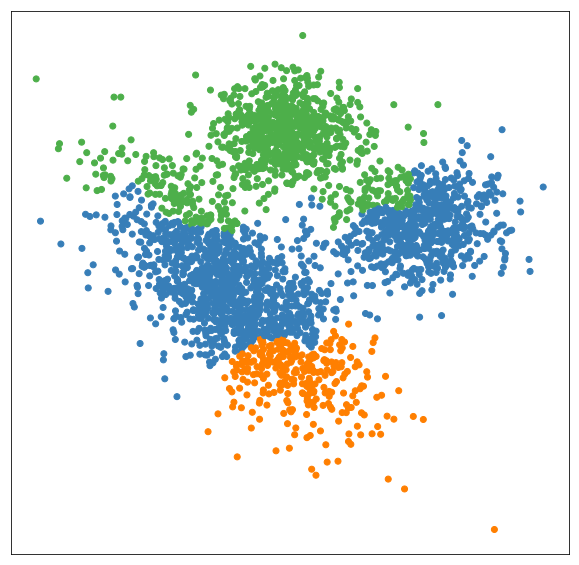

In [26]:
from sklearn.neighbors import kneighbors_graph

#connectivity = kneighbors_graph(X, n_neighbors=6, include_self=False)
#connectivity = 0.5 * (connectivity + connectivity.T)

ac = AgglomerativeClustering(n_clusters=3, 
                                 linkage='complete',
                                 #connectivity=connectivity
                            )
    
with warnings.catch_warnings():
    warnings.filterwarnings(
        "ignore",
        message="the number of connected components of the " +
        "connectivity matrix is [0-9]{1,2}" +
        " > 1. Completing it to avoid stopping the tree early.",
        category=UserWarning)
    ac.fit(X)
y_pred = ac.labels_.astype(np.int)
plt.xticks([]); plt.yticks([])
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                              int(max(y_pred) + 1))))
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])
print(silhouette_score(X=X, labels=y_pred, metric='euclidean'))
print(homogeneity_score(labels_true=y, labels_pred=y_pred))
print(completeness_score(labels_true=y, labels_pred=y_pred))
print(v_measure_score(labels_true=y, labels_pred=y_pred))

0.37652761742
0.466547855883
0.638545170274
0.539161632594


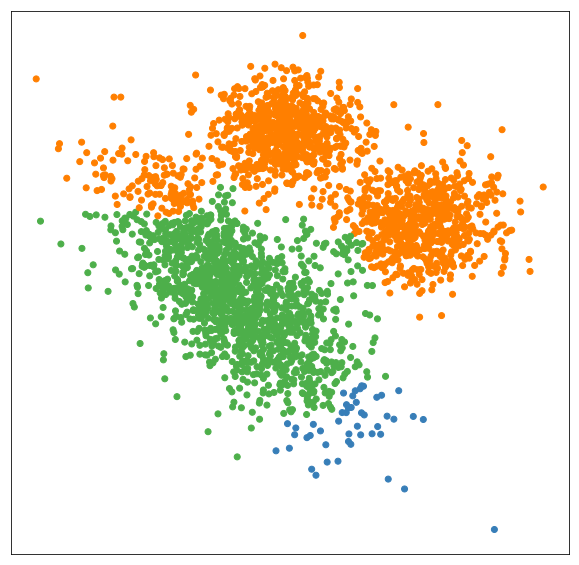

In [27]:
from sklearn.neighbors import kneighbors_graph

#connectivity = kneighbors_graph(X, n_neighbors=6, include_self=False)
#connectivity = 0.5 * (connectivity + connectivity.T)

ac = AgglomerativeClustering(n_clusters=3, 
                                 linkage='average',
                                 #connectivity=connectivity
                            )
    
with warnings.catch_warnings():
    warnings.filterwarnings(
        "ignore",
        message="the number of connected components of the " +
        "connectivity matrix is [0-9]{1,2}" +
        " > 1. Completing it to avoid stopping the tree early.",
        category=UserWarning)
    ac.fit(X)
y_pred = ac.labels_.astype(np.int)
plt.xticks([]); plt.yticks([])
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                              int(max(y_pred) + 1))))
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])
print(silhouette_score(X=X, labels=y_pred, metric='euclidean'))
print(homogeneity_score(labels_true=y, labels_pred=y_pred))
print(completeness_score(labels_true=y, labels_pred=y_pred))
print(v_measure_score(labels_true=y, labels_pred=y_pred))

0.39339127832
0.000444658319642
0.077001788351
0.000884210633011


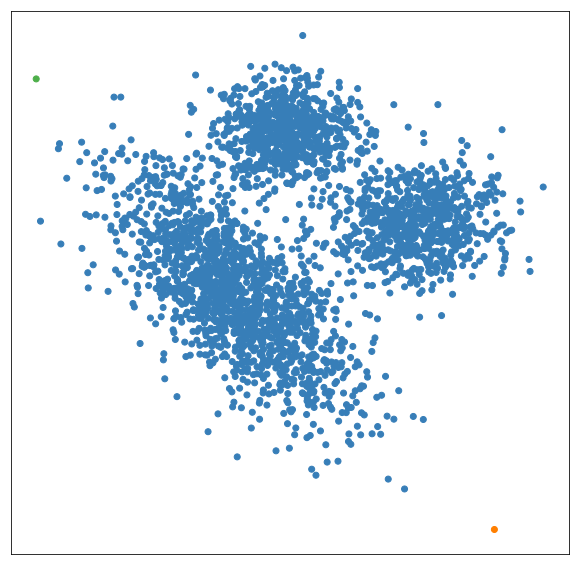

In [28]:
from sklearn.neighbors import kneighbors_graph

#connectivity = kneighbors_graph(X, n_neighbors=6, include_self=False)
#connectivity = 0.5 * (connectivity + connectivity.T)

ac = AgglomerativeClustering(n_clusters=3, 
                                 linkage='single',
                                 #connectivity=connectivity
                            )
    
with warnings.catch_warnings():
    warnings.filterwarnings(
        "ignore",
        message="the number of connected components of the " +
        "connectivity matrix is [0-9]{1,2}" +
        " > 1. Completing it to avoid stopping the tree early.",
        category=UserWarning)
    ac.fit(X)
y_pred = ac.labels_.astype(np.int)
plt.xticks([]); plt.yticks([])
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                              int(max(y_pred) + 1))))
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])
print(silhouette_score(X=X, labels=y_pred, metric='euclidean'))
print(homogeneity_score(labels_true=y, labels_pred=y_pred))
print(completeness_score(labels_true=y, labels_pred=y_pred))
print(v_measure_score(labels_true=y, labels_pred=y_pred))